# SIGN LANGUAGE AND SIGN PREDICTION

**Install Necessary Library**

In [6]:
%pip install opencv-python

  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [12]:
%pip install --user mediapipe

  Using cached mediapipe-0.10.20-cp312-cp312-win_amd64.whl.metadata (9.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached jax-0.4.37-py3-none-any.whl.metadata (22 kB)
  Using cached jaxlib-0.4.36-cp312-cp312-win_amd64.whl.metadata (1.1 kB)
  Using cached opencv_contrib_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached sounddevice-0.5.1-py3-none-win_amd64.whl.metadata (1.4 kB)
  Using cached ml_dtypes-0.5.0-cp312-cp312-win_amd64.whl.metadata (22 kB)
Using cached mediapipe-0.10.20-cp312-cp312-win_amd64.whl (51.0 MB)
Using cached sounddevice-0.5.1-py3-none-win_amd64.whl (363 kB)
Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
Using cached jax-0.4.37-py3-none-any.whl (2.2 MB)
Using cached jaxlib-0.4.36-cp312-cp312-win_amd64.whl (63.3 MB)
Using cached opencv_contrib_python-4.10.0.84-cp37-abi3-win_amd64.whl (45.5 MB)
Using cached ml_dtypes-0.5.0-cp312-cp312-win_amd64.whl (213 kB)
Note: you may need to restart the kernel to use upd

### Create Mesh like Structure On Upper Body using Mediapipe and Opencv

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# Set up MediaPipe Holistic
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic
mp_face_mesh = mp.solutions.face_mesh  # Added this for face landmarks

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False  # Image is no longer writeable
    results = model.process(image)  # Make prediction
    image.flags.writeable = True  # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # COLOR CONVERSION RGB 2 BGR
    return image, results

def draw_landmarks(image, results):
    if results.face_landmarks:
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_face_mesh.FACEMESH_TESSELATION)  # Use FaceMesh for facial connections
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)  # Draw pose connections
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)  # Draw left hand connections
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)  # Draw right hand connections

def draw_styled_landmarks(image, results):
    # Draw face connections (use FaceMesh FACEMESH_TESSELATION)
    if results.face_landmarks:
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_face_mesh.FACEMESH_TESSELATION,
                                 mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1))
    # Draw pose connections
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2))
    # Draw left hand connections
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2))
    # Draw right hand connections  
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2))

# Start capturing video from the webcam
cap = cv2.VideoCapture(0)

# Set MediaPipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show the result on screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully if 'q' is pressed
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [2]:
draw_landmarks(frame, results)

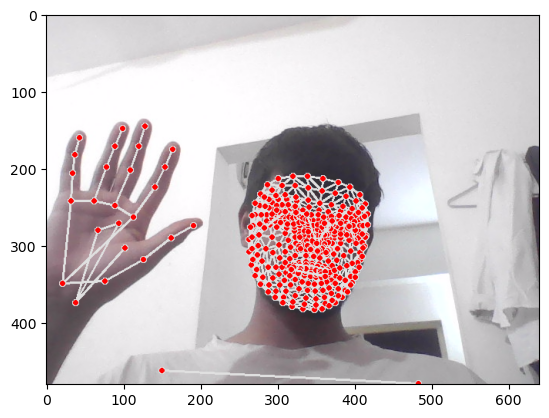

In [3]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [4]:
len(results.right_hand_landmarks.landmark)

21

In [5]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)


In [6]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)


In [7]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])


In [8]:
result_test = extract_keypoints(results)


In [9]:
result_test


array([ 0.54887521,  0.61947733, -0.65875876, ...,  0.06786045,
        0.33535227, -0.04273764])

### CREATING LOCALLY STORING MANUAL DATASET OF SIGN 

In [25]:
# Path to create dataset
DATA_PATH = os.path.join('D:/MAJOR/4thYProjectCode/Dataset') 

# Actions that we try to detect
actions = np.array(['Blank', 'Hello!', 'My', 'Name', 'Is'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

**CREATING FOLDERS TO STORE DATASET**

In [28]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

**REAL-TIME DATASET CREATION**

In [32]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

* Hello: Right Hand Hi
* My:  Both Hand All-haa
* Name: Both Hand Cris-cross
* Is: left hand Mutthi

## INITIALIZING TENSORFLOW AND LSTM SEQUENTIAL MODEL

In [4]:
%pip install tensorflow

  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 1.0/390.3 MB 12.7 MB/s eta 0:00:31
   ---------------------------------------- 3.7/390.3 MB 13.6 MB/s eta 0:00:29
    --------------------------------------- 9.7/390.3 MB 19.5 MB/s eta 0:00:20
   - -------------------------------------- 17.3/390.3 MB 24.8 MB/s eta 0:00:16
   -- ------------------------------------- 27.5/390.3 MB 30.6 MB/s eta 0:00:12
   --- -------------------------------

**TRAINING MODEL**

In [30]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [31]:
label_map = {label:num for num, label in enumerate(actions)}


In [34]:
label_map


{'Blank': 0, 'Hello!': 1, 'My': 2, 'Name': 3, 'Is': 4}

In [36]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [37]:
X = np.array(sequences)
X.shape


(150, 30, 1662)

In [38]:
y = to_categorical(labels).astype(int)


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard


In [41]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

**BUILDING LSTM MODEL AND PRINTING SUMMERAY**

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Input

model = Sequential()
model.add(Input(shape=(30, 1662)))  # Define the input shape here

# First LSTM block
model.add(LSTM(64, return_sequences=True, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Second LSTM block
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Third LSTM block
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Fourth LSTM block
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Dense layers for feature learning
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(actions.shape[0], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 64)              │         442,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 30, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 30, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 30, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 30, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 743,045 (2.83 MB)

 Trainable params: 741,893 (2.83 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [44]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])


In [45]:
history = model.fit(X_train, y_train, epochs=200, callbacks=[tb_callback])

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - categorical_accuracy: 0.1889 - loss: 2.3364
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.2589 - loss: 1.9878
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.1701 - loss: 2.0464
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 0.2016 - loss: 1.9766
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.2696 - loss: 2.0420
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.2351 - loss: 1.7817
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.2418 - loss: 1.8081
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.2299 - loss: 1.9094
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.3059 - loss: 1.7594
Epoch 10/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.2618 - loss: 1.6612
Epoch 11/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0

In [55]:
res = model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


**PLOTTING ACCCURACY & LOSS**

Accuracy: 0.8963
Loss: 0.3643


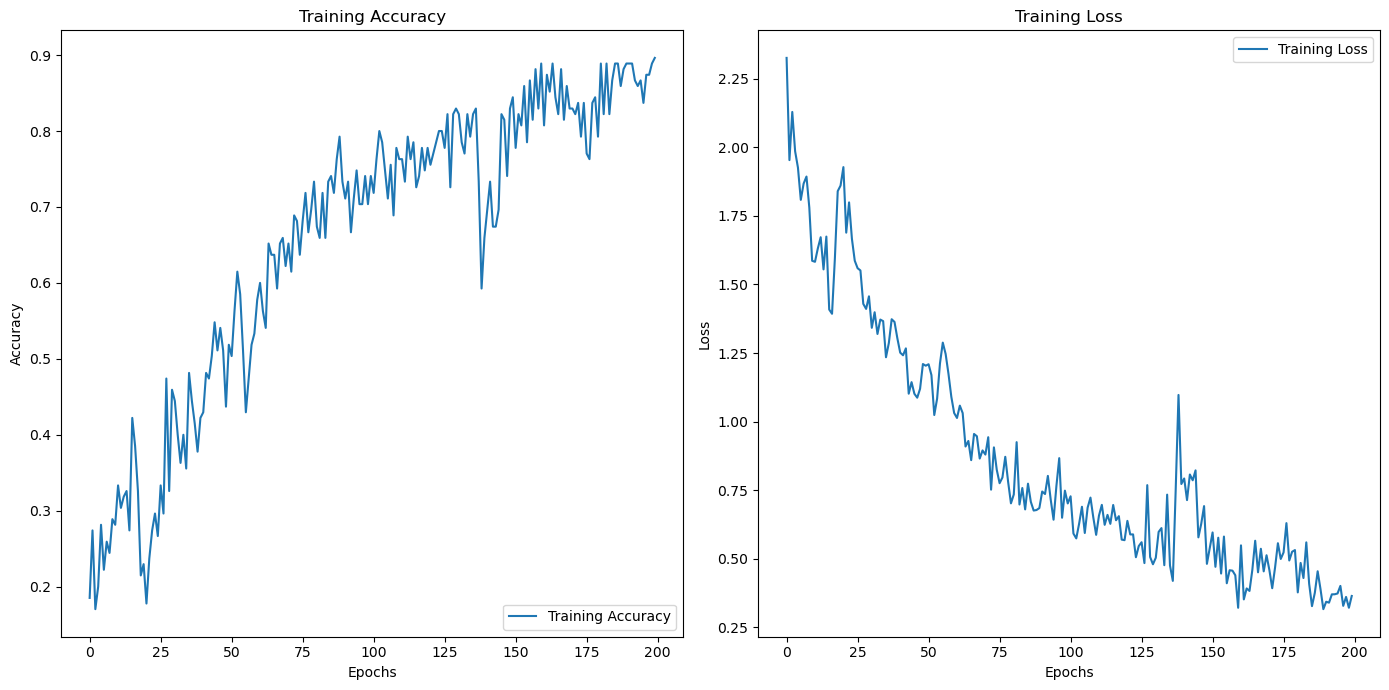

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Accuracy of the final epoch
final_epoch_accuracy = history.history['categorical_accuracy'][-1]
final_epoch_loss = history.history['loss'][-1]
print(f"Accuracy: {final_epoch_accuracy:.4f}")
print(f"Loss: {final_epoch_loss:.4f}")


# Plot accuracy and loss graphs
epochs_range = range(len(history.history['loss']))

plt.figure(figsize=(14, 7))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['categorical_accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


**SAVING MODEL AND LOADING WEIGHTS**

In [61]:
model.save('D:/MAJOR/4thYProjectCode/bestmodel.keras')

In [63]:
model.load_weights('D:/MAJOR/4thYProjectCode/action1.keras')

**CONFUSION METRIX**

In [66]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report

In [68]:
yhat = model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [70]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [72]:
 cm = multilabel_confusion_matrix(ytrue, yhat)


Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       1.00      0.29      0.44         7
           4       0.80      1.00      0.89         4

    accuracy                           0.53        15
   macro avg       0.66      0.56      0.57        15
weighted avg       0.81      0.53      0.58        15

Confusion Matrix for Label 0:
 [[12  1]
 [ 1  1]]


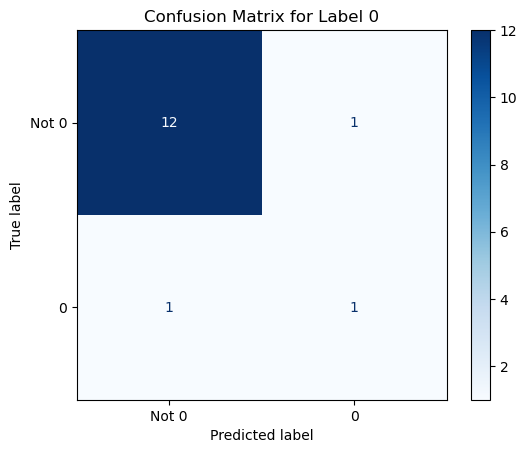

Confusion Matrix for Label 1:
 [[14  0]
 [ 0  1]]


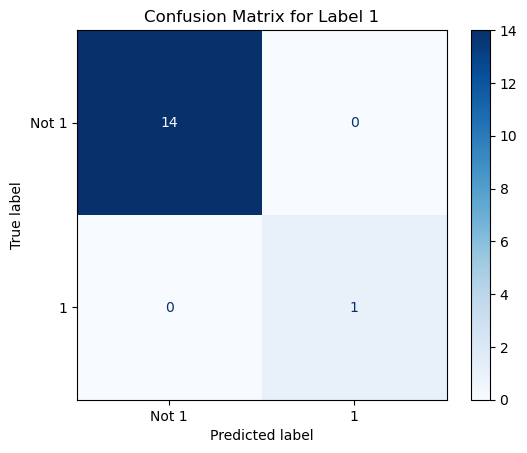

Confusion Matrix for Label 2:
 [[9 5]
 [1 0]]


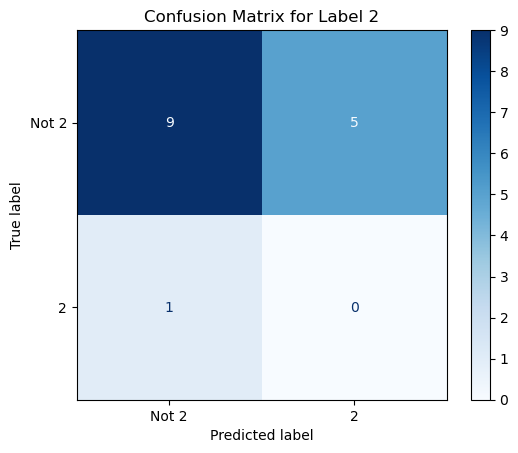

Confusion Matrix for Label 3:
 [[8 0]
 [5 2]]


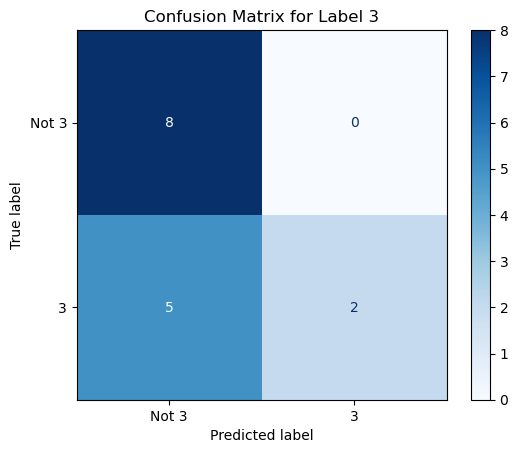

Confusion Matrix for Label 4:
 [[10  1]
 [ 0  4]]


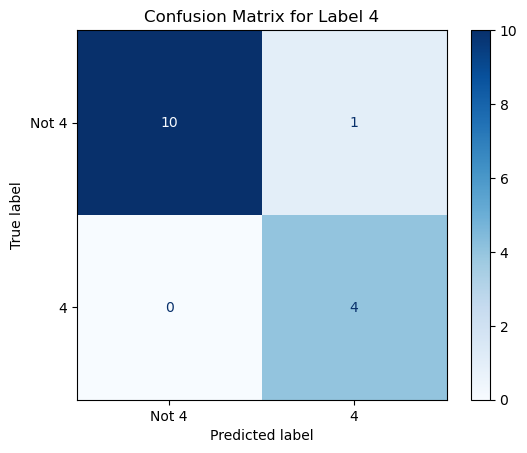

In [74]:
# Display classification report for performance metrics
print("Classification Report:\n", classification_report(ytrue, yhat, zero_division=1))

# Print and plot confusion matrices for each label
labels = sorted(set(ytrue))  # Adjust labels as per your use case
for i, label in enumerate(labels):
    print(f"Confusion Matrix for Label {label}:\n", cm[i])

    disp = ConfusionMatrixDisplay(confusion_matrix=cm[i], display_labels=[f"Not {label}", f"{label}"])
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix for Label {label}")
    plt.show()


## **PREDICTION ANALYSIS**

In [77]:
from scipy import stats

In [79]:
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245), (255, 87, 51), (0, 204, 204)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame


In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti